# klasifikasi kandungan mie+formalin menggunakan SVM 

In [1]:
# using algoritma svm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import os


## kategorikan data sesuai dengan jumlah ppm (kandungan formalin)

### 0 ppm

In [2]:
base_path = '../data/'

In [3]:
ppm_0 = ['mie basah formalin 0 ppm 1.xls', 'mie basah formalin 0 ppm 2.xls', 'mie basah formalin 0 ppm 3.xls']
# join data
df_0 = pd.concat([pd.read_excel(os.path.join(base_path, f)) for f in ppm_0])

In [4]:
df_0.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses
0,1,1,420,382,298,344,257,113,B_x000D_\n
1,2,2,423,378,298,348,260,106,B_x000D_\n
2,3,3,421,377,312,344,260,115,B_x000D_\n
3,4,4,418,382,299,345,257,105,B_x000D_\n
4,5,5,419,369,302,344,252,114,B_x000D_\n


In [5]:
# tambah kolom ppm dengan nilai 0
df_0['ppm'] = 0

In [6]:
df_0.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm
0,1,1,420,382,298,344,257,113,B_x000D_\n,0
1,2,2,423,378,298,348,260,106,B_x000D_\n,0
2,3,3,421,377,312,344,260,115,B_x000D_\n,0
3,4,4,418,382,299,345,257,105,B_x000D_\n,0
4,5,5,419,369,302,344,252,114,B_x000D_\n,0


In [7]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 0 to 3281
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time (s)  9759 non-null   int64 
 1   Number    9759 non-null   int64 
 2   TGS2600   9759 non-null   int64 
 3   TGS2602   9759 non-null   int64 
 4   TGS2611   9759 non-null   int64 
 5   TGS2610   9759 non-null   int64 
 6   TGS2620   9759 non-null   int64 
 7   TGS826    9759 non-null   int64 
 8   Proses    9759 non-null   object
 9   ppm       9759 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 838.7+ KB


### 15 ppm

In [8]:
ppm_15 = ['mie basah formalin 15 ppm 1.xls', 'mie basah formalin 15 ppm 2.xls', 'mie basah formalin 15 ppm 3.xls']
df_15 = pd.concat([pd.read_excel(os.path.join(base_path, f)) for f in ppm_15])
df_15['ppm'] = 15
df_15.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm
0,1,1,388,318,280,323,223,83,B_x000D_\n,15
1,2,2,382,325,277,321,232,84,B_x000D_\n,15
2,3,3,385,322,275,321,223,80,B_x000D_\n,15
3,4,4,385,324,279,318,225,92,B_x000D_\n,15
4,5,5,380,326,276,321,230,88,B_x000D_\n,15


In [9]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9979 entries, 0 to 3205
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time (s)  9979 non-null   int64 
 1   Number    9979 non-null   int64 
 2   TGS2600   9979 non-null   int64 
 3   TGS2602   9979 non-null   int64 
 4   TGS2611   9979 non-null   int64 
 5   TGS2610   9979 non-null   int64 
 6   TGS2620   9979 non-null   int64 
 7   TGS826    9979 non-null   int64 
 8   Proses    9979 non-null   object
 9   ppm       9979 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 857.6+ KB


### 35 ppm

In [10]:
ppm_35 = ['mie basah formalin 35 ppm 1.xls', 'mie basah formalin 35 ppm 2.xls', 'mie basah formalin 35 ppm 3.xls']
df_35 = pd.concat([pd.read_excel(os.path.join(base_path, f)) for f in ppm_35])
df_35['ppm'] = 35
df_35.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm
0,1,1,492,499,321,368,334,239,B_x000D_\n,35
1,2,2,486,495,324,375,337,244,B_x000D_\n,35
2,3,3,500,502,315,373,336,240,B_x000D_\n,35
3,4,4,489,497,316,371,337,244,B_x000D_\n,35
4,5,5,487,492,316,371,337,241,B_x000D_\n,35


In [11]:
df_35.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10824 entries, 0 to 3520
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time (s)  10824 non-null  int64 
 1   Number    10824 non-null  int64 
 2   TGS2600   10824 non-null  int64 
 3   TGS2602   10824 non-null  int64 
 4   TGS2611   10824 non-null  int64 
 5   TGS2610   10824 non-null  int64 
 6   TGS2620   10824 non-null  int64 
 7   TGS826    10824 non-null  int64 
 8   Proses    10824 non-null  object
 9   ppm       10824 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 930.2+ KB


## Gabungkan semua data

In [12]:
# join semua data
df = pd.concat([df_0, df_15, df_35])
df.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm
0,1,1,420,382,298,344,257,113,B_x000D_\n,0
1,2,2,423,378,298,348,260,106,B_x000D_\n,0
2,3,3,421,377,312,344,260,115,B_x000D_\n,0
3,4,4,418,382,299,345,257,105,B_x000D_\n,0
4,5,5,419,369,302,344,252,114,B_x000D_\n,0


In [13]:
df['Proses'] = df['Proses'].str.replace("_x000D_\n", "")
df.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm
0,1,1,420,382,298,344,257,113,B,0
1,2,2,423,378,298,348,260,106,B,0
2,3,3,421,377,312,344,260,115,B,0
3,4,4,418,382,299,345,257,105,B,0
4,5,5,419,369,302,344,252,114,B,0


In [14]:
df['Kategori'] = df['ppm'].apply(lambda x: 'Aman' if x == 0 else ('Tidak Sehat' if x == 15 else 'Bahaya'))
df.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm,Kategori
0,1,1,420,382,298,344,257,113,B,0,Aman
1,2,2,423,378,298,348,260,106,B,0,Aman
2,3,3,421,377,312,344,260,115,B,0,Aman
3,4,4,418,382,299,345,257,105,B,0,Aman
4,5,5,419,369,302,344,252,114,B,0,Aman


keterangan data:  
Time (S) = waktu dalam detik  
Number = waktu dalam detik per kategori proses (B = 10 detik, S = 120 detik, P = 250 detik)  
TGS2600 - TGS826 = sensor TGS untuk mendeteksi kandungan formalin 
proses = kategori proses  
________B = Waktu baseline: Waktu yang dibutuhkan sensor untuk merespon saat pembacaan daya tanpa adanya sampel yang diuji.  
________S = Waktu Sensing: Waktu yang dibutuhkan sensor pada proses pembauan aroma sampel yang menghasilkan tegangan pada masing-masing sensor.  
________P = Waktu Purging: Waktu yang dibutuhkan pada proses pembersihan chamber dengan menggunakan udara bersih.  
ppm = kandungan formalin dalam satuan ppm (part per million)  
kategori = merupakan label target, apabila ppm = 0 maka termasuk kedalam kategori aman, jika 0>x≤35 ppm maka termasuk kedalam kategori tidak sehat, dan jika ppm > 35 ppm maka termasuk kedalam kategori bahaya.

In [15]:
df.to_excel(os.path.join(base_path, 'mie_basah_formalin.xlsx'), index=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30562 entries, 0 to 3520
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Time (s)  30562 non-null  int64 
 1   Number    30562 non-null  int64 
 2   TGS2600   30562 non-null  int64 
 3   TGS2602   30562 non-null  int64 
 4   TGS2611   30562 non-null  int64 
 5   TGS2610   30562 non-null  int64 
 6   TGS2620   30562 non-null  int64 
 7   TGS826    30562 non-null  int64 
 8   Proses    30562 non-null  object
 9   ppm       30562 non-null  int64 
 10  Kategori  30562 non-null  object
dtypes: int64(9), object(2)
memory usage: 2.8+ MB


In [17]:
# cek missing value
df.isnull().sum()

Time (s)    0
Number      0
TGS2600     0
TGS2602     0
TGS2611     0
TGS2610     0
TGS2620     0
TGS826      0
Proses      0
ppm         0
Kategori    0
dtype: int64

In [18]:
# cek duplikat
df.duplicated().sum()

np.int64(0)

In [19]:
# cek unique value serta jumlahnya
print(df['Proses'].value_counts())
print(df['ppm'].value_counts())
print(df['Kategori'].value_counts())

Proses
P    18871
S    10898
B      793
Name: count, dtype: int64
ppm
35    10824
15     9979
0      9759
Name: count, dtype: int64
Kategori
Bahaya         10824
Tidak Sehat     9979
Aman            9759
Name: count, dtype: int64


     TGS2600  TGS2602  TGS2611  TGS2610  TGS2620  TGS826
ppm                                                     
0     403.55   387.61   300.59   349.85   240.77  106.54
15    390.79   329.77   289.49   340.95   230.55   87.80
35    396.52   354.31   299.90   352.42   236.03   95.88


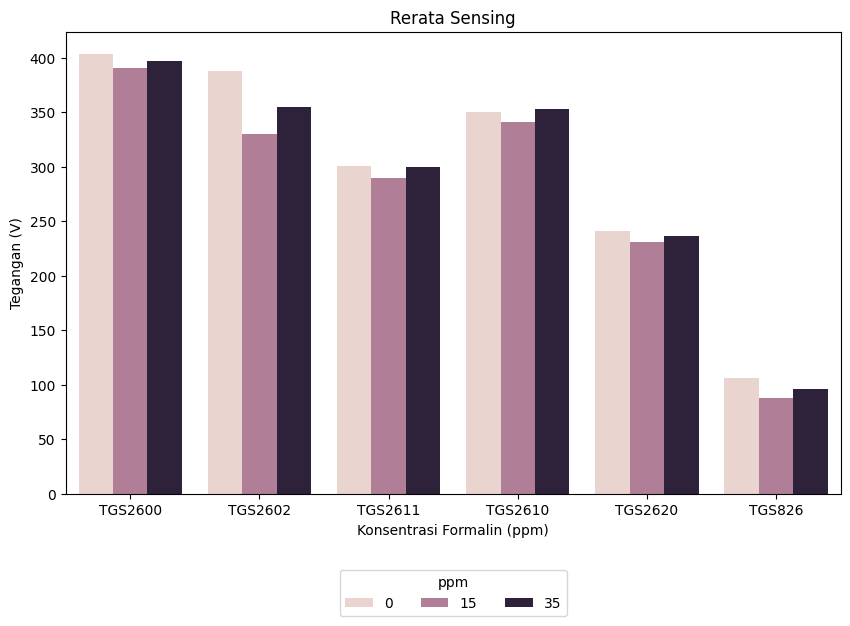

In [20]:
sensing = df[df['Proses'] == 'S']
tgs2600_mean = round(sensing.groupby('ppm')['TGS2600'].mean(), 2)
tgs2602_mean = round(sensing.groupby('ppm')['TGS2602'].mean(), 2)
tgs2611_mean = round(sensing.groupby('ppm')['TGS2611'].mean(), 2)
tgs2610_mean = round(sensing.groupby('ppm')['TGS2610'].mean(), 2)
tgs2620_mean = round(sensing.groupby('ppm')['TGS2620'].mean(), 2)
tgs826_mean = round(sensing.groupby('ppm')['TGS826'].mean(), 2)


tgs2600_mean = pd.DataFrame(tgs2600_mean)
tgs2602_mean = pd.DataFrame(tgs2602_mean)
tgs2611_mean = pd.DataFrame(tgs2611_mean)
tgs2610_mean = pd.DataFrame(tgs2610_mean)
tgs2620_mean = pd.DataFrame(tgs2620_mean)
tgs826_mean = pd.DataFrame(tgs826_mean)

tgs_mean = tgs2600_mean.join(tgs2602_mean).join(tgs2611_mean).join(tgs2610_mean).join(tgs2620_mean).join(tgs826_mean)
print(tgs_mean)
# save data to excel
tgs_mean.to_excel('hasil_mie_formalin/rerata_sensing.xlsx')


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='tgs' , y='value', hue='ppm', data=pd.melt(tgs_mean.reset_index(), id_vars='ppm', var_name='tgs', value_name='value'), ax=ax)
plt.xlabel('Konsentrasi Formalin (ppm)')
plt.ylabel('Tegangan (V)')
plt.title('Rerata Sensing')
plt.legend(title='ppm', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


In [21]:
# uji linearitas r^2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['TGS2600', 'TGS2602', 'TGS2611', 'TGS2610', 'TGS2620', 'TGS826']]
y = df['ppm'].values

for i in X.columns:
    model = LinearRegression()
    model.fit(X[[i]], y)
    y_pred = model.predict(X[[i]])
    print(f'{i} r^2: {r2_score(y, y_pred)}')

r2 = []
for i in X.columns:
    model = LinearRegression()
    model.fit(X[[i]], y)
    y_pred = model.predict(X[[i]])
    r2.append(r2_score(y, y_pred))

r2 = pd.DataFrame(r2, index=X.columns, columns=['r2'])
r2.to_excel('hasil_mie_formalin/uji_linearitas.xlsx')

TGS2600 r^2: 0.011315875897076166
TGS2602 r^2: 0.0842879653562677
TGS2611 r^2: 0.00805228572175909
TGS2610 r^2: 0.03345171542667713
TGS2620 r^2: 0.00470645068320974
TGS826 r^2: 0.05236214031437625


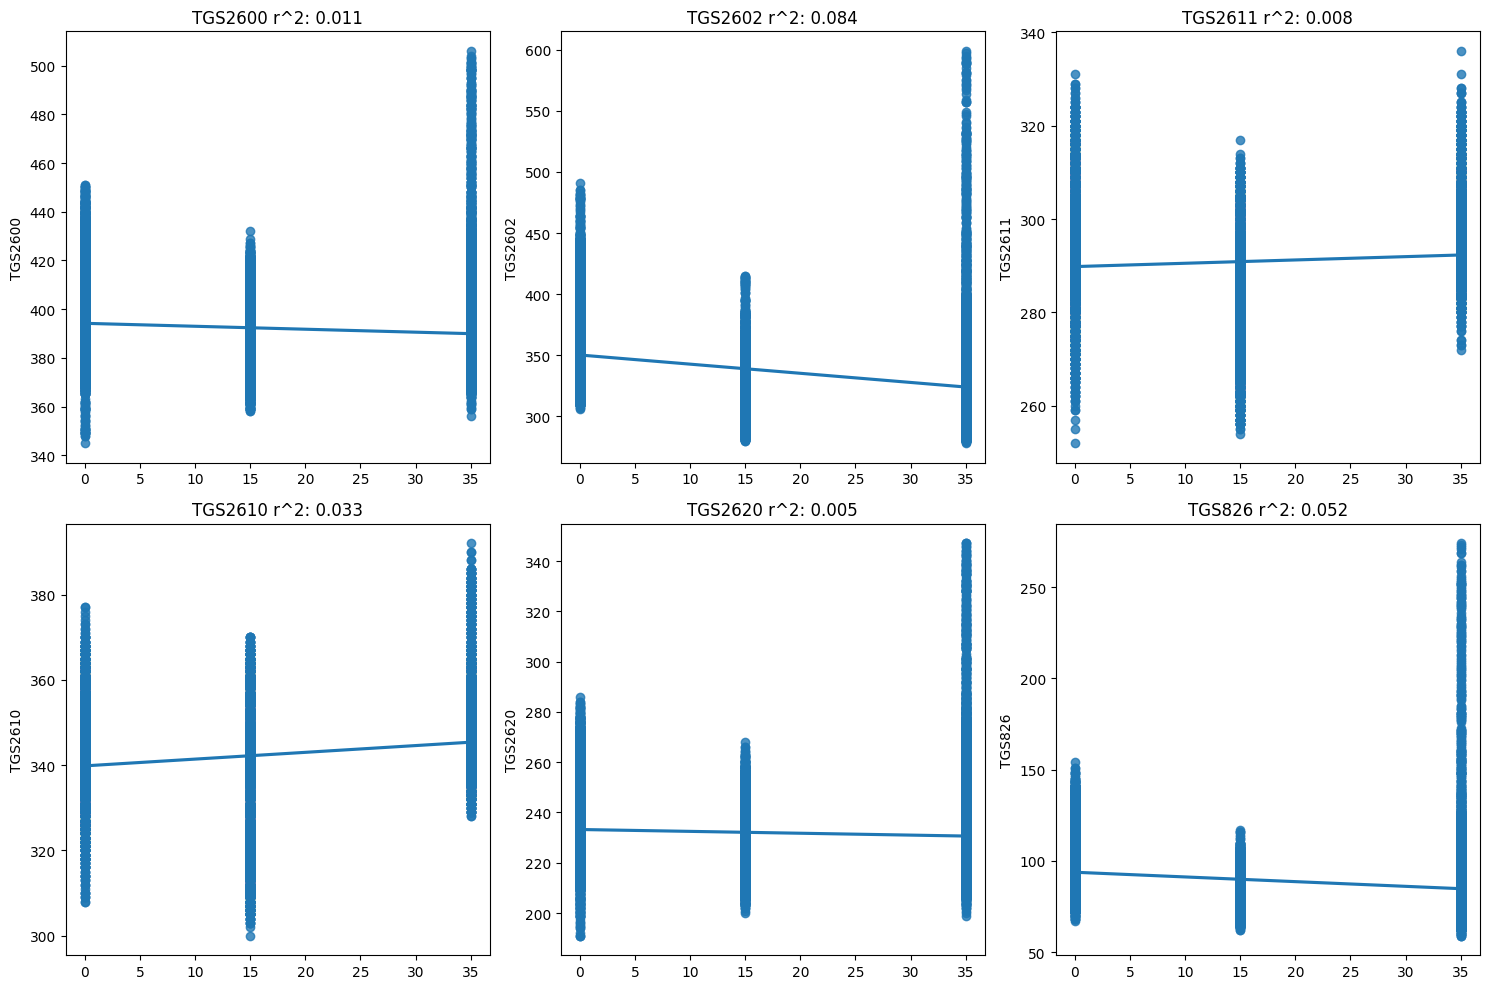

In [22]:
# buat kurva regresi linear sumbu y = ppm dan sumbu x = tegangan
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(X.columns):
    model = LinearRegression()
    model.fit(X[[col]], y)
    y_pred = model.predict(X[[col]])
    sns.regplot(x=y, y=X[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'{col} r^2: {r2_score(y, y_pred):.3f}')

plt.tight_layout()
plt.show()



In [23]:
# uji presisi 
# rumus CV = (deviasi standar / rerata sensing) * 100%
tgs2600_st = sensing.groupby('ppm')['TGS2600'].std()
tgs2602_st = sensing.groupby('ppm')['TGS2602'].std()
tgs2611_st = sensing.groupby('ppm')['TGS2611'].std()
tgs2610_st = sensing.groupby('ppm')['TGS2610'].std()
tgs2620_st = sensing.groupby('ppm')['TGS2620'].std()
tgs826_st = sensing.groupby('ppm')['TGS826'].std()

tgs2600_st = pd.DataFrame(tgs2600_st)
tgs2602_st = pd.DataFrame(tgs2602_st)
tgs2611_st = pd.DataFrame(tgs2611_st)
tgs2610_st = pd.DataFrame(tgs2610_st)
tgs2620_st = pd.DataFrame(tgs2620_st)
tgs826_st = pd.DataFrame(tgs826_st)

tgs_st = tgs2600_st.join(tgs2602_st).join(tgs2611_st).join(tgs2610_st).join(tgs2620_st).join(tgs826_st)

cv = (tgs_st / tgs_mean) * 100
print(cv)

#  SAVE DATA TO EXCEL
cv.to_excel('hasil_mie_formalin/uji_presisi.xlsx')


      TGS2600    TGS2602   TGS2611   TGS2610   TGS2620     TGS826
ppm                                                              
0    4.070145   8.120286  3.246371  2.421928  6.040674  14.132508
15   3.061355   6.444798  3.857767  4.233335  4.746370   7.454686
35   5.505922  12.112602  2.452700  2.331012  9.451378  27.851505


In [25]:
df['Proses'] = df['Proses'].replace({'B': 0, 'S': 1, 'P': 2})
df.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm,Kategori
0,1,1,420,382,298,344,257,113,0,0,Aman
1,2,2,423,378,298,348,260,106,0,0,Aman
2,3,3,421,377,312,344,260,115,0,0,Aman
3,4,4,418,382,299,345,257,105,0,0,Aman
4,5,5,419,369,302,344,252,114,0,0,Aman


data pada kolom proses diubah sebagai berikut:  
B menjadi 0    
S menjadi 1  
P menjadi 2  

In [27]:
df['Kategori'] = df['Kategori'].replace({'Aman': 0, 'Tidak Sehat': 1, 'Bahaya': 2})
df.head()

,Time (s),Number,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,Proses,ppm,Kategori
0,1,1,420,382,298,344,257,113,0,0,0
1,2,2,423,378,298,348,260,106,0,0,0
2,3,3,421,377,312,344,260,115,0,0,0
3,4,4,418,382,299,345,257,105,0,0,0
4,5,5,419,369,302,344,252,114,0,0,0


In [28]:
df.shape

(30562, 11)

In [29]:
X = df[['TGS2600', 'TGS2602','TGS2611','TGS2610','TGS2620',	'TGS826', 'ppm']]
y = df['Kategori']

In [30]:
X.head()

,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,ppm
0,420,382,298,344,257,113,0
1,423,378,298,348,260,106,0
2,421,377,312,344,260,115,0
3,418,382,299,345,257,105,0
4,419,369,302,344,252,114,0


In [31]:
print(y.unique())

[0 1 2]


0 = aman, 1 = tidak sehat, 2 = bahaya

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24449, 7) (6113, 7) (24449,) (6113,)


### MODEL SVM
Validasi metode e-nose dengan SVM:  
proses penilaian terhadap metode e-nose dengan SVM (akurasi, sesitifitas, selektifitas)

In [33]:
model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluasi model

### confusion matrix

Confusion Matrix :
[[1932    0    0]
 [   0 2038    0]
 [   0    0 2143]]


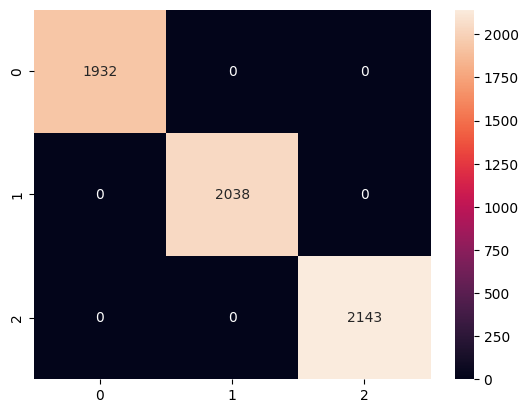

In [34]:
# confusion matrix
y_pred = model.predict(X_test)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.savefig('hasil/confusion_matrix.png')
plt.show()


In [35]:
# hitung TP, TN, FP, FN pada kelas 0 (aman)
TP_0= cm[0, 0]
TN_0 = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]
FP_0 = cm[1, 0] + cm[2, 0]
FN_0 = cm[0, 1] + cm[0, 2]
print('True Positive :', TP_0)
print('True Negative :', TN_0)
print('False Positive :', FP_0)
print('False Negative :', FN_0)

True Positive : 1932
True Negative : 4181
False Positive : 0
False Negative : 0


In [36]:
# hitung TP, TN, FP, FN pada kelas 1 (tidak sehat)
TP_1 = cm[1, 1]
TN_1 = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]
FP_1 = cm[0, 1] + cm[2, 1]
FN_1 = cm[1, 0] + cm[1, 2]
print('True Positive :', TP_1)
print('True Negative :', TN_1)
print('False Positive :', FP_1)
print('False Negative :', FN_1)


True Positive : 2038
True Negative : 4075
False Positive : 0
False Negative : 0


In [37]:
# hitung TP, TN, FP, FN pada kelas 2 (bahaya)
TP_2 = cm[2, 2]
TN_2 = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]
FP_2 = cm[0, 2] + cm[1, 2]
FN_2 = cm[2, 0] + cm[2, 1]
print('True Positive :', TP_2)
print('True Negative :', TN_2)
print('False Positive :', FP_2)
print('False Negative :', FN_2)


True Positive : 2143
True Negative : 3970
False Positive : 0
False Negative : 0


In [38]:
# save data to excel
data = {
    'Kelas': ['Aman', 'Tidak Sehat', 'Bahaya'],
    'TP': [TP_0, TP_1, TP_2],
    'TN': [TN_0, TN_1, TN_2],
    'FP': [FP_0, FP_1, FP_2],
    'FN': [FN_0, FN_1, FN_2]
}

df = pd.DataFrame(data)
df.to_excel('hasil/TP_TN_FP_FN.xlsx', index=False)

### akurasi

In [39]:
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 1.0


### sensitifitas / recall

In [40]:
# hitung recall
print('Recall :', recall_score(y_test, y_pred, average='weighted'))

Recall : 1.0


### selektifitas

In [41]:
# hitung jumlah TN 
TN = TN_0 + TN_1 + TN_2
# hitung jumlah FP
FP = FP_0 + FP_1 + FP_2

# selektifitas
selektifitas = TN / (TN + FP) * 100
print('Selektifitas :', selektifitas)

Selektifitas : 100.0


In [42]:
# classifcation report

target_names = ['aman', 'tidak sehat', 'berbahaya']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))





              precision    recall  f1-score   support

        aman      1.000     1.000     1.000      1932
 tidak sehat      1.000     1.000     1.000      2038
   berbahaya      1.000     1.000     1.000      2143

    accuracy                          1.000      6113
   macro avg      1.000     1.000     1.000      6113
weighted avg      1.000     1.000     1.000      6113



In [43]:
# save data to excel
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
df = pd.DataFrame(report)


In [44]:
#  simpan hasil klassifikasi ke dalam excel
y_pred = model.predict(X_test)
X_test['kategori'] = y_test
X_test['prediksi'] = y_pred
# ubah nilai kategori menjadi string 0 aman, 1 tidak sehat, 2 berbahaya
X_test['kategori'] = X_test['kategori'].replace({0: 'aman', 1: 'tidak sehat', 2: 'berbahaya'})
X_test['prediksi'] = X_test['prediksi'].replace({0: 'aman', 1: 'tidak sehat', 2: 'berbahaya'})
X_test.to_excel('hasil/hasil_prediksi.xlsx', index=False)

In [45]:
# hasil prediksi
hasil_prediksi = pd.read_excel('hasil/hasil_prediksi.xlsx')
hasil_prediksi.head()

,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,ppm,kategori,prediksi
0,392,330,294,336,237,91,35,berbahaya,berbahaya
1,387,330,299,350,222,94,35,berbahaya,berbahaya
2,397,336,295,344,236,88,0,aman,aman
3,414,319,299,345,256,89,15,tidak sehat,tidak sehat
4,429,464,305,345,259,132,35,berbahaya,berbahaya


In [46]:
# tampilan hasil prediksi yang salah
hasil_prediksi[hasil_prediksi['kategori'] != hasil_prediksi['prediksi']]


,TGS2600,TGS2602,TGS2611,TGS2610,TGS2620,TGS826,ppm,kategori,prediksi


In [47]:
# hitung jumlah prediksi yang benar dan salah
benar = hasil_prediksi[hasil_prediksi['kategori'] == hasil_prediksi['prediksi']].shape[0]
salah = hasil_prediksi[hasil_prediksi['kategori'] != hasil_prediksi['prediksi']].shape[0]

print('Prediksi Benar :', benar)
print('Prediksi Salah :', salah)

Prediksi Benar : 6113
Prediksi Salah : 0


In [54]:
import pandas as pd

feature_names = ["TGS2600",	"TGS2602",	"TGS2611",	"TGS2610",	"TGS2620",	"TGS826",	"ppm"]

data = pd.DataFrame([[290, 310, 294, 336, 237, 91, 0]], columns=feature_names)

prediksi = model.predict(data)
print('Prediksi :', prediksi[0])

if prediksi[0] == 0:
    print('Aman')
elif prediksi[0] == 15:
    print('Tidak Sehat')
else:
    print('Bahaya')


Prediksi : 0
Aman
